In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('epfl_challengeC_samp.mat')
voltage_dend = mat.get('voltage_dend')
voltage_soma = mat.get('voltage_soma')
current_dend = mat.get('current_dend')
current_soma = mat.get('current_soma')

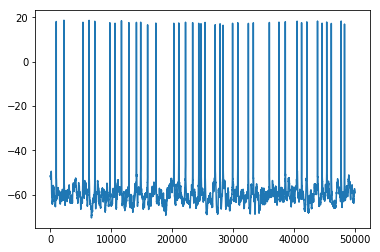

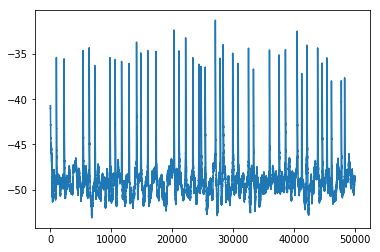

In [2]:
plt.plot(voltage_soma[:,0]) # plot the somatic voltage for trial 1
plt.show()
plt.plot(voltage_dend[:,0]) # plot the dendritic voltage for trial 1
plt.show()

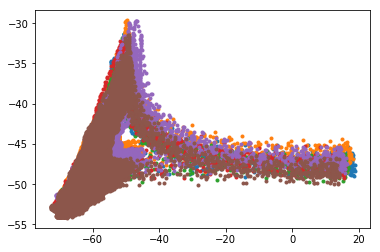

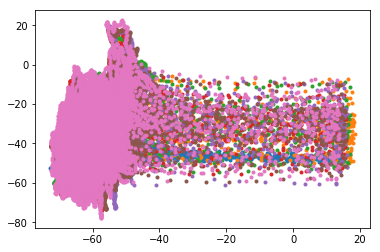

In [3]:
c=0
while c < 6: 
    plt.plot(voltage_soma[:,c], voltage_dend[:,c],'.')
    c = c + 1
plt.show()

while c < 13: 
    plt.plot(voltage_soma[:,c], voltage_dend[:,c],'.')
    c = c + 1
plt.show()

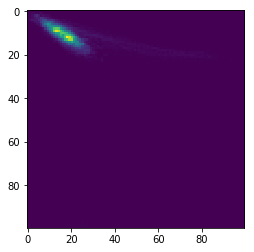

In [4]:
H, xedges, yedges = np.histogram2d(voltage_soma[:,0], voltage_dend[:,0],100)
plt.imshow(H/np.sum(H))
plt.show()


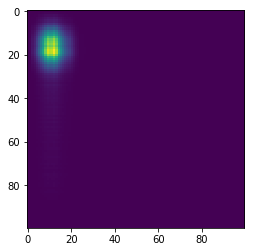

In [5]:

p1 = np.sum(H, axis=0)/np.sum(H)
p2 = np.sum(H, axis=1)/np.sum(H)
p_ind = (p1.reshape(100,1)*p2.reshape(1,100))
plt.imshow(p_ind)
plt.show()

In [6]:
p1.shape

(100,)

In [7]:
I = np.zeros(len(voltage_soma[:,0]))
c=0
while c < len(voltage_soma[:,0]):
    H, xedges, yedges = np.roll(np.histogram2d(voltage_soma[c,0], voltage_dend[c,0]),2)
    p1 = np.sum(H, axis=0)/np.sum(H)
    p2 = np.sum(H, axis=1)/np.sum(H)
    #p_ind = (p1.reshape(100,1)*p2.reshape(1,100))
    I[c] = H * np.log2((H/p1*p2))
    c = c + 1

IndexError: list index out of range

In [9]:
voltage_dend.shape

(50001, 14)